In [39]:
from sklearn.neighbors import KernelDensity
from scipy.stats import multivariate_normal
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

(80, 100, 3)
24000


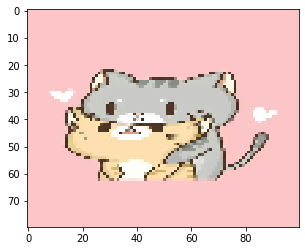

In [45]:
cat= cv2.imread(r'C:\Users\ATHUL VIJAY M P\Desktop\Pattern\cat.jpg')
cat1 =cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
cat_new=cv2.resize(cat1, (100, 80))
print(cat_new.shape)
print(cat_new.size)
plt.imshow(cat_new)
plt.show()

In [41]:
R,G,B=cv2.split(cat_new)
print(R,G,B)

[[252 252 252 ... 252 252 245]
 [252 252 252 ... 252 252 245]
 [252 252 252 ... 252 252 245]
 ...
 [252 252 252 ... 252 252 245]
 [252 252 252 ... 252 252 245]
 [252 252 252 ... 252 252 245]] [[197 197 197 ... 197 197 197]
 [197 197 197 ... 197 197 197]
 [197 197 197 ... 197 197 197]
 ...
 [197 197 197 ... 197 197 197]
 [197 197 197 ... 197 197 197]
 [197 197 197 ... 197 197 197]] [[200 200 200 ... 200 200 197]
 [200 200 200 ... 200 200 197]
 [200 200 200 ... 200 200 197]
 ...
 [200 200 200 ... 200 200 197]
 [200 200 200 ... 200 200 197]
 [200 200 200 ... 200 200 197]]


In [49]:
#CONVERTING TO rgs SPACE
i=0
j=0
r= np.zeros(shape=(80,100))
g= np.zeros(shape=(80,100))
s= np.zeros(shape=(80,100))
for i in range (0,80):
    for j in range(0,100):
        d = np.asscalar(R[i][j])
        e = np.asscalar(G[i][j])
        f = np.asscalar(B[i][j])
        r[i][j]=(d/(d+e+f))
        g[i][j]=(e/(d+e+f))
        s[i][j]=((d+e+f)/3)

print(r)
print(g)
print(s)

[[0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.30829421]
 [0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.30829421]
 [0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.30829421]
 ...
 [0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.30829421]
 [0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.30829421]
 [0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.30829421]]
[[0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.30829421]
 [0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.30829421]
 [0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.30829421]
 ...
 [0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.30829421]
 [0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.30829421]
 [0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.30829421]]
[[255. 255. 255. ... 255. 255. 213.]
 [255. 255. 255. ... 255. 255. 213.]
 [255. 255. 255. ... 255. 255. 213.]
 

C:\Users\ATHUL VIJAY M P\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  if __name__ == '__main__':
C:\Users\ATHUL VIJAY M P\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ATHUL VIJAY M P\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  # This is added back by InteractiveShellApp.init_path()


In [38]:
def Var(data):
    Y=np.reshape(data,(10,1))
    grid = GridSearchCV(KernelDensity(), {'bandwidth': np.linspace(0.001, 50, 1000)}, cv=10)
    grid.fit(Y)

    bw=grid.best_estimator_.bandwidth 
    sd=bw*(20**(0.2))/1.06
    return sd*sd

def PDF(m,cov,x):
  var = multivariate_normal(m, cov)
  return var.pdf(x)
  

C:\Users\ATHUL VIJAY M P\anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
C:\Users\ATHUL VIJAY M P\anaconda3\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
C:\Users\ATHUL VIJAY M P\anaconda3\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


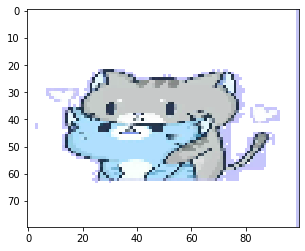

In [47]:

xf=np.arange(45,55,1)
yf=np.arange(35,45,1)
xb=np.arange(0,10,1)
yb=np.arange(0,10,1)

Xrf=list(map(lambda xf,yf: r[xf][yf] , xf,yf))
Xgf=list(map(lambda xf,yf: g[xf][yf] , xf,yf))
Xsf=list(map(lambda xf,yf: s[xf][yf] , xf,yf))

Xrb=list(map(lambda xb,yb: r[xb][yb] , xb,yb))
Xgb=list(map(lambda xb,yb: g[xb][yb] , xb,yb))
Xsb=list(map(lambda xb,yb: s[xb][yb] , xb,yb))
fbw1=Var(Xrf);fbw2=Var(Xgf);fbw3=Var(Xsf)
bbw1=Var(Xrb);bbw2=Var(Xgb);bbw3=Var(Xsb)
fg=[]
bg=[]
for i in range(10):
    fsum=0;bsum=0  
    Xfg=[Xrf[i],Xgf[i],Xsf[i]]
    Xbg=[Xrb[i],Xgb[i],Xsb[i]]
    for j in range(10):
        m1=[Xrf[j],Xgf[j],Xsf[j]]
        m2=[Xrb[j],Xgb[j],Xsb[j]]
        cov1=np.array([[fbw1,0,0],[0,fbw2,0],[0,0,fbw3]])
        cov2=np.array([[bbw1,0,0],[0,bbw2,0],[0,0,bbw3]])
        fsum=fsum+PDF(m1,cov1,Xfg)
        bsum=bsum+PDF(m2,cov2,Xbg)
    fg.append(fsum/10)
    bg.append(bsum/10)
    

  
for i in range(80):
    for j in range(100):
      wfg =0;wbg=0
      x=[r[i][j],g[i][j],s[i][j]]
      for k in range(10):
         m1=[Xrf[k],Xgf[k],Xsf[k]]
         m2=[Xrb[k],Xgb[k],Xsb[k]]
        
         wfg =wfg +(PDF(m1,cov1,x))*fg[k]
         wbg=wbg+(PDF(m2,cov2,x))*bg[k]
         
      if wfg <wbg:
          [cat_seperated[i][j][0],cat_seperated[i][j][1],cat_seperated[i][j][2]]=[255,255,255]
          
          
  
plt.imshow(cat_seperated)
plt.show()     

